# **Naive Bayes**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Naive Bayes en la calificacion de calidad de vinos
```

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.naive_bayes import GaussianNB

## **2. Leer datos**

In [2]:
datos = pd.read_csv('winequality.csv', sep=',')
datos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
1,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
2,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
3,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
4,8.0,0.600,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5
5,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6
6,6.9,0.390,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,4
7,11.6,0.230,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
8,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6
9,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6


## **3. Descripcion de datos**

In [4]:
# Estadisticos basicos por atributos
print(datos.describe().transpose())

                       count       mean        std      min      25%  \
fixed acidity         1593.0   8.319523   1.738144  4.60000   7.1000   
volatile acidity      1593.0   0.527476   0.179059  0.12000   0.3900   
citric acid           1593.0   0.271161   0.194954  0.00000   0.0900   
residual sugar        1593.0   2.538010   1.409835  0.90000   1.9000   
chlorides             1593.0   0.087501   0.047140  0.01200   0.0700   
free sulfur dioxide   1593.0  15.875706  10.466847  1.00000   7.0000   
total sulfur dioxide  1593.0  46.391714  32.885012  6.00000  22.0000   
density               1593.0   2.213269   9.681967  0.99007   0.9956   
pH                    1593.0   3.311224   0.154190  2.74000   3.2100   
sulphates             1593.0   0.658054   0.169692  0.33000   0.5500   
alcohol               1593.0  10.422379   1.063917  8.40000   9.5000   
quality               1593.0   5.629002   0.764204  4.00000   5.0000   

                           50%       75%      max  
fixed acidi

## **4. Histograma**

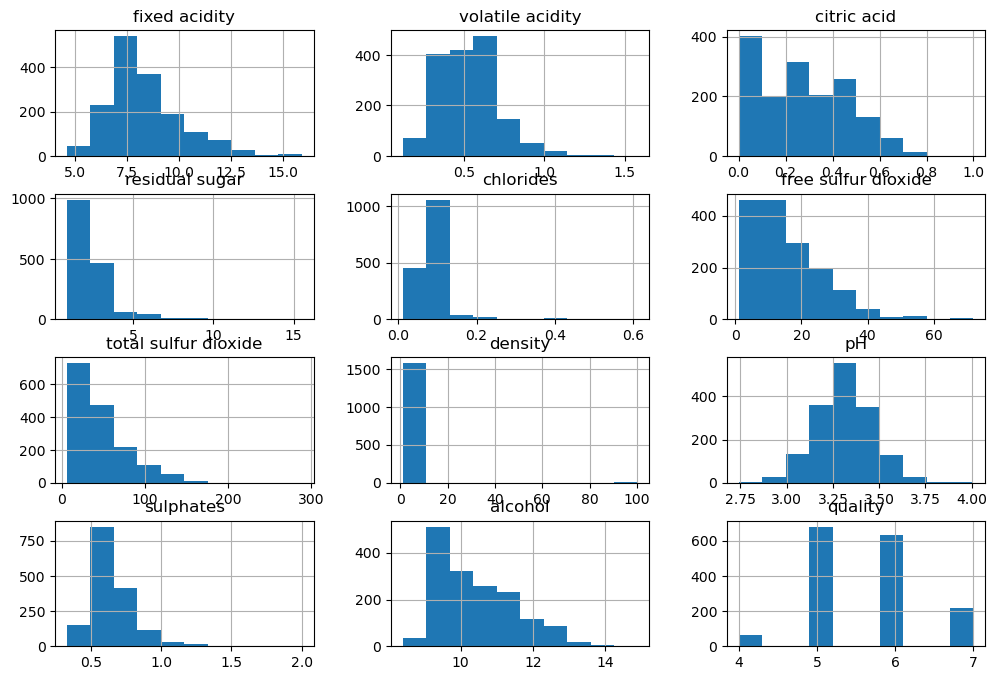

In [5]:
datos.hist(figsize=(12,8))
plt.show()

## **5. Distribucion de clases**

In [6]:
# Numero de registros por especie de iris
print(datos.groupby('quality').size())

quality
4     63
5    681
6    633
7    216
dtype: int64


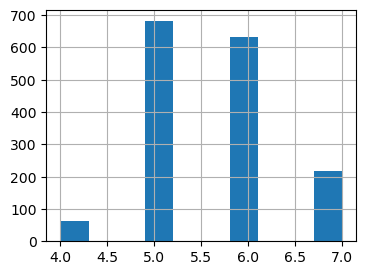

In [7]:
plt.figure(figsize=(4,3))
datos['quality'].hist()
plt.show()

## **6. Separacion de datos, para entrenamiento y test**

In [46]:
x = datos.drop(['quality'], axis=1)
y = datos['quality']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17, train_size=0.7)
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
977,11.3,0.370,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5
56,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8
864,7.8,0.735,0.08,2.4,0.092,10.0,41.0,0.99740,3.24,0.71,9.8
325,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6
1042,10.0,0.490,0.20,11.0,0.071,13.0,50.0,10.01500,3.16,0.69,9.2


## **7. Entrenamiento de Naive Bayes**

In [47]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [48]:
# Exactitud del entrenamiento
NaiveBayes.score(x_test, y_test)

0.5502092050209205

## **8. Prueba(test) del modelo**

In [49]:
# Datos de prueba
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
81,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
663,5.4,0.58,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2
1474,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5
187,10.7,0.46,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5
408,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6


In [50]:
# Prediccion con los datos de test
pred = NaiveBayes.predict(x_test)
print(pred)

[4 6 5 6 6 5 5 7 5 4 6 5 5 6 6 5 5 5 6 6 7 5 7 5 7 7 6 6 5 4 6 5 7 5 7 6 6
 6 6 4 5 5 6 6 7 4 5 4 5 6 5 6 6 6 5 6 5 6 6 6 5 5 6 7 5 6 6 7 5 5 4 6 7 5
 4 4 6 6 6 5 4 6 4 6 7 5 4 5 6 5 6 6 7 6 4 5 5 7 6 7 5 7 4 7 7 5 7 5 4 5 5
 6 5 6 7 5 7 4 6 5 7 5 5 6 6 6 6 5 7 5 7 6 5 6 6 6 5 7 5 4 6 7 7 7 4 6 4 6
 7 6 6 7 5 6 6 4 6 6 6 5 5 7 6 5 5 7 7 6 5 7 5 6 7 4 7 5 4 5 7 6 6 5 5 5 5
 6 5 6 6 5 7 7 7 5 5 5 5 5 7 6 4 5 6 7 6 6 6 5 6 6 4 4 5 7 6 6 6 5 6 6 6 7
 5 4 5 5 6 7 6 5 7 5 7 6 5 7 5 7 4 7 4 6 5 5 5 4 6 6 5 6 6 5 7 6 6 4 6 6 4
 6 7 5 5 6 6 7 7 7 6 6 5 7 6 5 7 7 6 7 6 6 6 4 5 5 6 4 7 5 5 6 5 5 4 5 6 7
 6 6 6 6 5 5 6 6 7 5 4 6 6 6 7 5 7 7 6 6 6 6 5 7 6 6 5 6 6 6 5 5 5 5 7 6 6
 6 6 7 5 6 7 5 5 5 4 4 5 6 7 6 6 4 6 5 5 6 6 6 6 7 6 6 6 6 5 5 6 4 6 6 6 5
 7 4 7 5 5 6 5 5 4 6 5 6 7 5 6 6 5 6 7 6 5 7 6 7 4 6 5 6 4 6 6 4 5 7 7 6 6
 6 5 6 6 7 7 5 6 6 7 6 6 6 5 6 6 6 6 5 4 5 5 6 6 6 5 5 7 5 7 5 7 7 6 4 6 5
 6 6 6 6 5 6 6 6 6 6 6 6 7 5 4 5 6 4 7 5 6 6 5 7 5 6 5 6 7 6 6 6 4 6]


## **9. Matriz de confusion y metricas**

In [51]:
# Dataframe con las etiqueta reales (y_test) y las generadas pro el modelo (pred)

# Crear una lista de tuplas con los valores de y_test y pred
resultados = list(zip(y_test, pred))

# Crear el Dataframe a partir de la lista de tuplas
df = pd.DataFrame(resultados, columns=['y_test', 'pred'])
df

,y_test,pred
0,4,4
1,6,6
2,5,5
3,5,6
4,5,6
...,...,...
473,5,6
474,5,6
475,6,6
476,5,4


In [52]:
# Generar la matriz de confusion
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusion')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusion
[[ 11   6   5   0]
 [ 22 108  72  10]
 [ 14  27 107  43]
 [  2   2  12  37]]
Exactitud =  0.5502092050209205


## **10. Prediccion**

In [53]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [54]:
# Crear un data set con un nuevo registro; cuidando la estructura del data set de entrenamiento
nuevo = pd.DataFrame(data=[[9.8, 0.46, 0.48, 1.4, 0.075, 3.0, 6.0, 0.99, 3.13, 0.63, 10.4]],
                     columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                            'pH', 'sulphates', 'alcohol'])

pred = NaiveBayes.predict(nuevo)
pred

array([7], dtype=int64)

In [55]:
# Prediccion directa
pred = NaiveBayes.predict([[9.8, 0.46, 0.48, 1.4, 0.075, 3.0, 6.0, 0.99, 3.13, 0.63, 10.4]])
pred

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([7], dtype=int64)